# Customer Segmentation - Case 2
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
Data of Mall
Customer segmentation is important for businesses to understand their target audience. Different advertisements can be curated and sent to different audience segments based on their demographic profile, interests, and affluence level.
unsupervised learning technique -K-Means clustering.
This algorithm can take in unlabelled customer data and assign each data point to clusters

The goal of K-Means is to group all the data available into non-overlapping sub-groups that are distinct from each other. That means each sub-group/cluster will consist of features that distinguish them from other clusters.

K-Means clustering is a commonly used technique by data scientists to help companies with customer segmentation. It is an important skill to have, and most data science interviews will test your understanding of this algorithm/your ability to apply it to real life scenarios.

In this case, you will learn the following:
- Data pre-processing for K-Means clustering
- Building a K-Means clustering algorithm from scratch
- The metrics used to evaluate the performance of a clustering model
- Visualizing clusters built
- Interpretation and analysis of clusters built
https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

In [1]:
## Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sea #!pip install sea
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Data
sheet_id = '18TBSlm0Sfxuqk-ccMAt2Vn1N3KFzTyPyDTxp8qT_h7w'
sheet_name = 'mallCustomers'
url1 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
print(url1)
df = pd.read_csv(url1)

https://docs.google.com/spreadsheets/d/18TBSlm0Sfxuqk-ccMAt2Vn1N3KFzTyPyDTxp8qT_h7w/gviz/tq?tqx=out:csv&sheet=mallCustomers


In [10]:
df.head()
# There are five variables in the dataset. CustomerID is the unique identifier of each customer in the dataset,
# and we can drop this variable. It doesn't provide us with any useful cluster information.
# Since gender is a categorial variable, it needs to be encoded and converted into numeric.
# All other variables will be scaled to follow a normal distribution before being fed into the model. 
# We will standardize these variables with a mean of 0 and a standard deviation of 1.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Standardisation
#tandardizing variables - lets standardize all variables in the dataset to get them around the same scale.
You can learn more about standardization here.
https://www.youtube.com/watch?v=mnKm3YP56PY

In [11]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()
#We can see that all the variables have been transformed, and are now centered around zero.

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


## One hot encoding
The variable 'gender' is categorical, and we need to transform this into a numeric variable.
This means that we need to substitute numbers for each category. We can do this with Pandas using pd.get_dummies().

In [12]:
gender = df['Gender']
newdf = scaled_features.join(gender)
newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
newdf = newdf.drop(['Gender_Male'],axis=1)
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


We can see that the gender variable has been transformed. You might have noticed that we dropped 'Gender_Male' from the data frame. This is because there is no need to keep the variable anymore.
The values for 'Gender_Male' can be inferred from 'Gender_Female,' (that is, if 'Gender_Female' is 0, then 'Gender_Male' will be 1 and vice versa).
To learn more about one-hot encoding on categorical variables, you can watch this YouTube video.
https://www.youtube.com/watch?v=6WDFfaYtN6s

## Building the clustering model
We can see that the optimal number of clusters is 4.
Then we take a look at another clustering metric.
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
lass sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')[source]¶

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

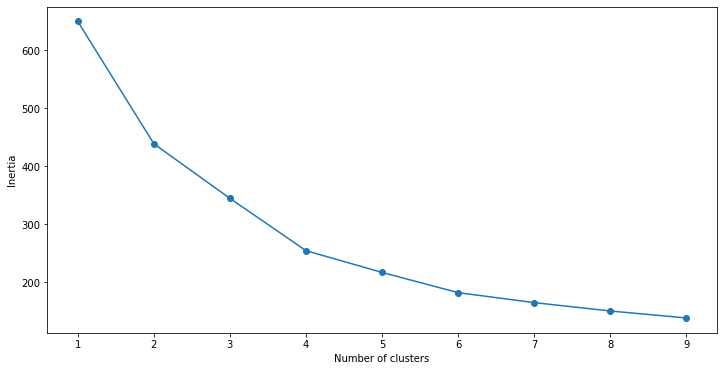

In [16]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Silhouette coefficient
A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm.
Silhouette scores range from -1 to +1. The higher the silhouette score, the better the model.
The silhouette score measures the distance between all the data points within the same cluster. The lower this distance, the better the silhouette score.
It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.
A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.
Lets calculate the silhouette score of the model we just built:

In [17]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))
#The silhouette score of this model is about 0.35. 
#This isn't a bad model, but we can do better and try getting higher cluster separation.

0.35027020434653977


In [21]:
# lets visualize the clusters we just built to get an idea of how well the model is doing:
clusters = kmeans.fit_predict(newdf.iloc[:, 1:])
newdf["label"] = clusters
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female,label
0,-1.738999,-1.424569,-0.434801,0,3
1,-1.738999,-1.281035,1.195704,0,0
2,-1.700830,-1.352802,-1.715913,1,3
3,-1.700830,-1.137502,1.040418,1,0
4,-1.662660,-0.563369,-0.395980,1,3


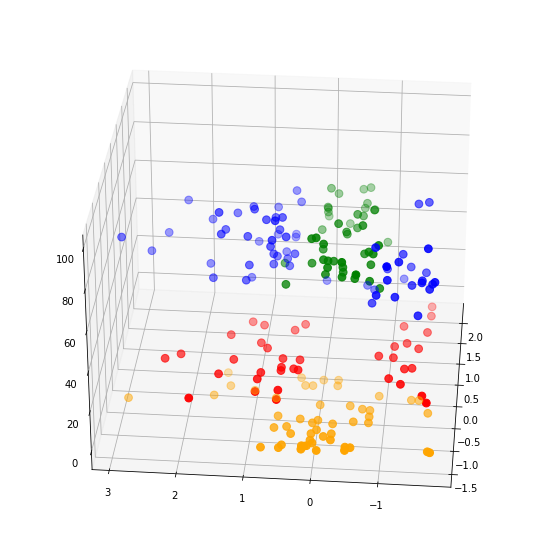

In [23]:
# Visualise
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], df["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], df["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show();

In [ ]:
# From the above diagram, we can see that cluster separation isn't too great.
# The red points are mixed with the blue, and the green are overlapping the yellow.
# This, along with the silhouette score shows us that the model isn't performing too well.
# Now, lets create a new model that has better cluster separability than this one.

## PCA
For this model, lets do some feature selection.
We can use a technique called Principal Component Analysis (PCA).
PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model.
We can select a subset of these variables and include them into the K-means model.
Now, lets run PCA on the dataset:


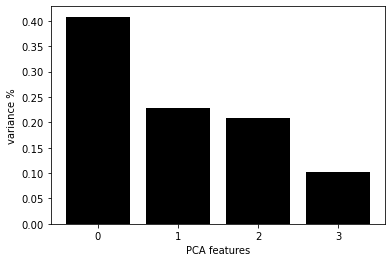

            0         1         2         3
0   -1.218313  2.403555 -0.339963  0.430204
1    1.956138  1.543002 -1.263027  0.500028
2   -1.992415  2.105716 -0.327077  1.286797
3    1.827438  1.451538 -1.297680  0.461281
4   -1.428196  1.818194 -0.683058 -0.065080
..        ...       ...       ...       ...
195  2.037021 -1.250184  1.618010 -0.344090
196 -0.059889 -1.966570  1.774340  0.390227
197  2.006357 -1.328213  1.914342 -0.032191
198 -1.486597 -0.917822  3.127827  0.214484
199  2.295482 -1.366299  2.329075 -0.280203

[200 rows x 4 columns]


In [27]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show();
PCA_components = pd.DataFrame(principalComponents)
print(PCA_components)

In [28]:
## Model 2
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=4)

0.5990697500755212


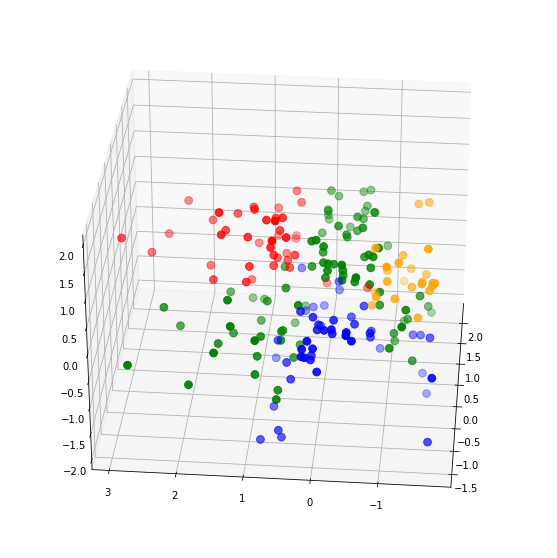

In [29]:
# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 
#The silhouette score of this model is 0.42, which is better than the previous model we created.
#We can visualize the clusters for this model just like we did earlier:

model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show();

In [30]:
print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))  #model-1
print(silhouette_score(PCA_components.iloc[:,:2], kmeans.labels_, metric='euclidean')) # model-2

0.27715327613018625
0.3769527505833002


## Interpretation
Notice that the clusters in the second model are much better separated than that in the first model.
Furthermore, the silhouette score of the second model is a lot higher.
For these reasons, we can pick the second model to go forward with our analysis.

## Cluster Analysis
Now that we're done building these different clusters, lets try to interpret them and look at the different customer segments.
First, lets map the clusters back to the dataset and take a look at the head of the data frame.

In [31]:
df = pd.read_csv(url1)
df = df.drop(['CustomerID'],axis=1)
# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0


Notice that each row in the data frame is now assigned to a cluster.

To compare attributes of the different clusters, lets find the average of all variables across each cluster:

In [33]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.head()

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,26.937500,53.437500,40.416667
1,1,32.731707,84.756098,81.048780
2,2,51.681818,62.125000,33.750000
3,3,25.521739,26.304348,78.565217


<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

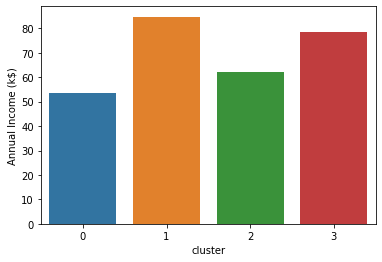

In [35]:
# We can interpret these clusters more easily if we visualized them. 
#Run these four lines of code to come up with different visualizations of each variable:
import seaborn as sns
sns.barplot(x='cluster',y='Age',data=avg_df)
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [36]:
## Gender Breakdown
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head()

Gender
cluster Gender        
0       Female      29
        Male        19
1       Female      22
        Male        19
2       Female      47

## Attributes of each segment
Main attributes of each segment

### Cluster 0:
- High average annual income, low spending.
- Mean age is around 40 and gender is predominantly male.

### Cluster 1:
- Low to mid average income, average spending capacity.
- Mean age is around 50 and gender is predominantly female.

### Cluster 2:
- Low average income, high spending score.
- Mean age is around 25 and gender is predominantly female.

### Cluster 3:
- High average income, high spending score.
- Mean age is around 30 and gender is predominantly female.

It is important to note that calculating the median age would provide better insight on the distribution of age within each cluster.

Also, females are more highly represented in the entire dataset, which is why most clusters contain a larger number of females than males. We can find the percentage of each gender relative to the numbers in the entire dataset to give us a better idea of gender distribution.


## Building personas around each cluster
Now that we know the attributes of each cluster, we can build personas around them.
Being able to tell a story around your analysis is an important skill to have as a data scientist.
This will help your clients or stakeholders understand your findings more easily.

Here is an example of building consumer personas based on the clusters created:

### Cluster 0: The frugal spender
This persona comprises of middle aged individuals who are very careful with money.
Despite having the highest average income compared to individuals in all other clusters, they spend the least.
This might be because they have financial responsibilities - like saving up for their kid's higher education.
Recommendation: Promos, coupons, and discount codes will attract individuals in this segment due to their tendency to spend less.

#### Cluster 1: Almost retired
This segment comprises of an older group of people.
They earn less and spend less, and are probably saving up for retirement.
Recommendation: Marketing to these individuals can be done through Facebook, which appeals to an older demographic. Promote healthcare related products to people in this segment.

### Cluster 2: The careless buyer
This segment is made up of a younger age group.
Individuals in this segment are most likely first jobbers. They make the least amount of money compared to all other segments.
However, they are very high spenders.
These are enthusiastic young individuals who enjoy living a good lifestyle, and tend to spend above their means.
Recommendation: Since these are young individuals who spend a lot, providing them with travel coupons or hotel discounts might be a good idea. Providing them with discounts off top clothing and makeup brands would also work well for this segment.

### Cluster 3: Highly affluent individuals
This segment is made up of middle-aged individuals.
These are individuals who have worked hard to build up a significant amount of wealth.
They also spend large amounts of money to live a good lifestyle.
These individuals have likely just started a family, and are leading baby or family-focused lifestyles. It is a good idea to promote baby or child related products to these individuals.
Recommendation: Due to their large spending capacity and their demographic, these individuals are likely to be looking for properties to buy or invest in. They are also more likely than all other segments to take out housing loans and make serious financial commitments.

## Conclusion
We have successfully built a K-Means clustering model for customer segmentation. We also explored cluster interpretation, and analyzed the behaviour of individuals in each cluster.
Finally, we took a look at some business recommendations that could be provided based on the attributes of each individual in the cluster.
You can use the analysis above as starter code for any clustering or segmentation project in the future.